In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import warnings 
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
red_wine=pd.read_csv(r'winequality-red.csv')

In [3]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#profile=ProfileReport(red_wine)
#profile

In [5]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# We see that there are 12 columns with 1599 rows. The data contains the multiple components that determine the quality of wine. There are no missing values. Data types are float and int

In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

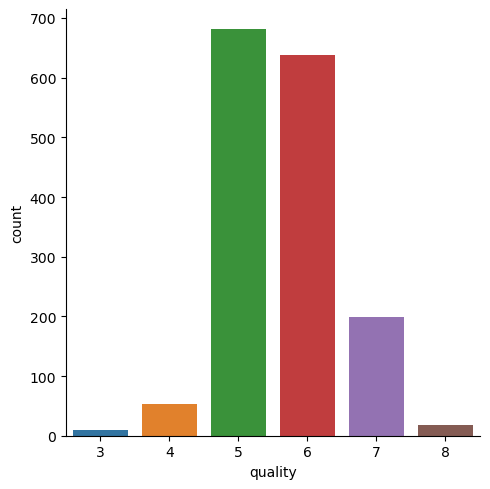

In [10]:
sns.catplot(x='quality', data=red_wine, kind='count')
plt.show()

As the mean is greater than median we derive to a conclusion that the graph right skewed. Also it is evident that we have outliers for fixed acidity, residual, free sulgur dioxide and total sulfur dioxide

In [11]:
redw=red_wine.corr()
redw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


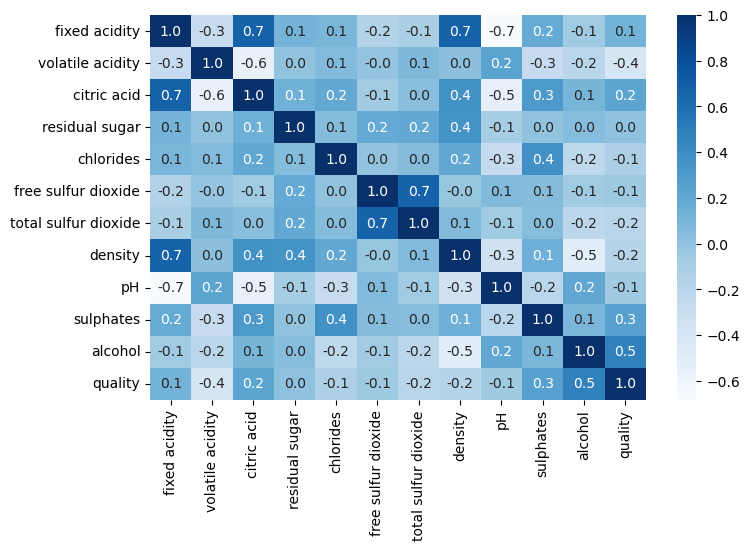

In [12]:
plt.figure(figsize=(8, 5))
sns.heatmap(redw,annot=True,fmt=".1f",cmap='Blues')
plt.show()

checking the positive and negative correlations and plotting the graphs to check colinearity with the result

comparing each paramater against the quality to understand its impact

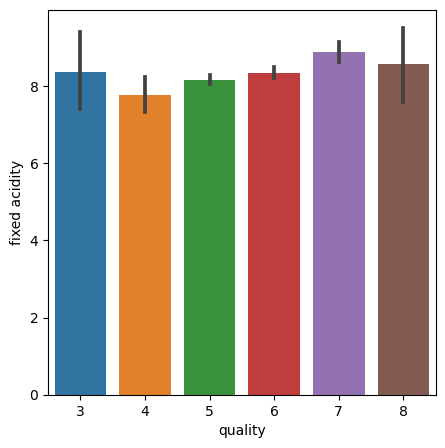

In [13]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='fixed acidity',data=red_wine)
plt.show()

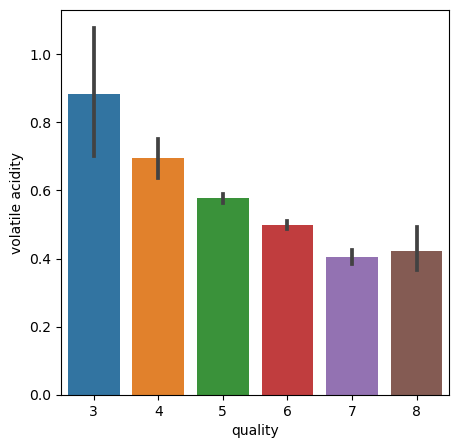

In [14]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity',data=red_wine)
plt.show()

#we can say that volatile acidity is inversly propotional to quality in other words( higher the volatile acidity less will be the quality)

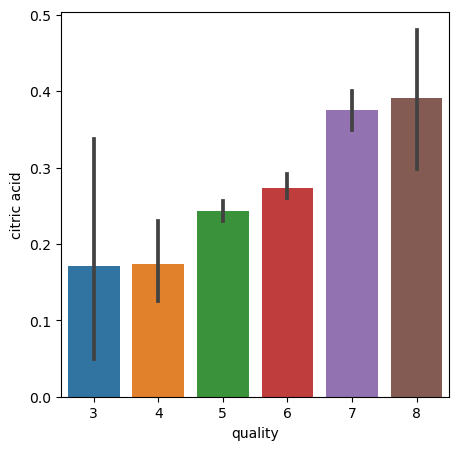

In [15]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='citric acid',data=red_wine)
plt.show()

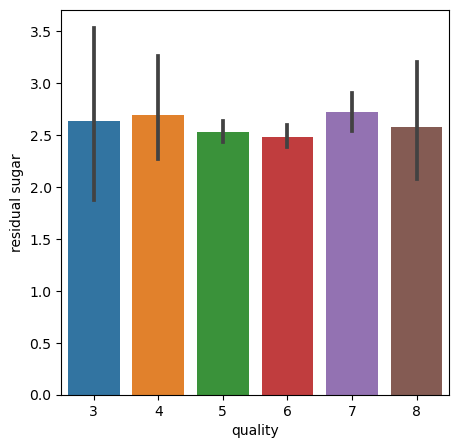

In [16]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='residual sugar',data=red_wine)
plt.show()

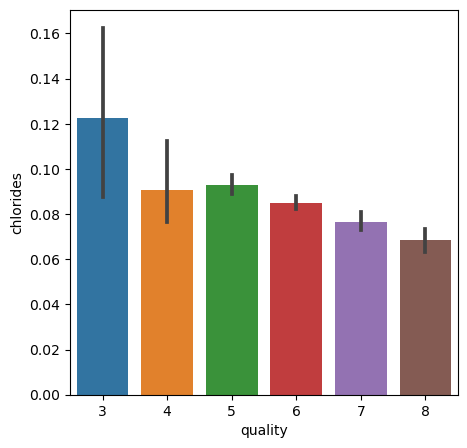

In [17]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='chlorides',data=red_wine)
plt.show()

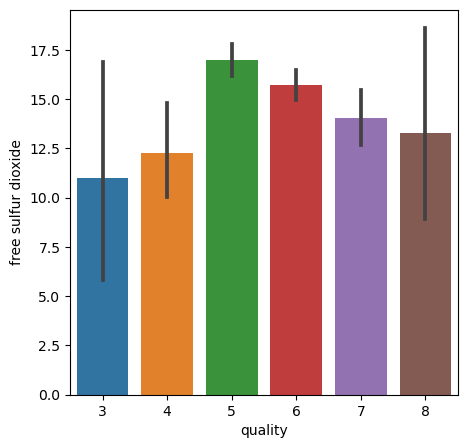

In [18]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='free sulfur dioxide',data=red_wine)
plt.show()

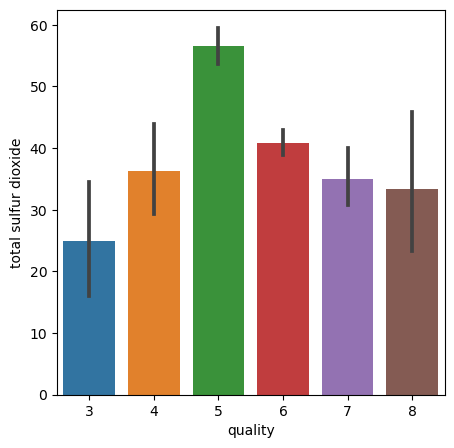

In [19]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='total sulfur dioxide',data=red_wine)
plt.show()

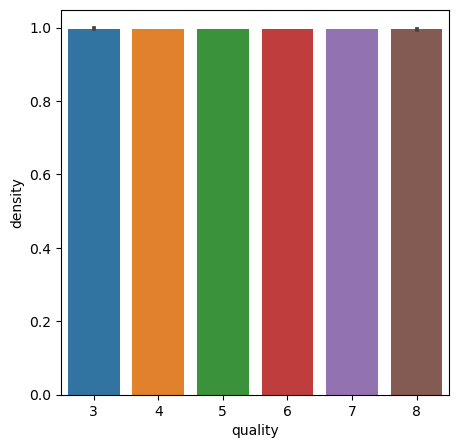

In [20]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='density',data=red_wine)
plt.show()

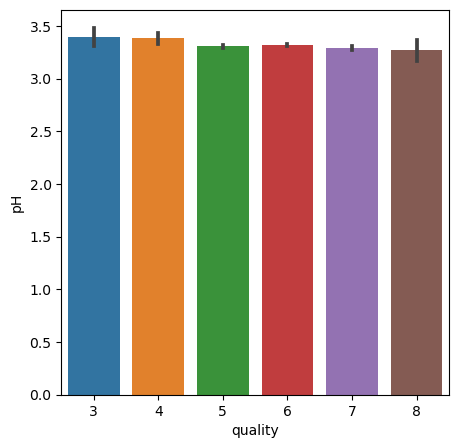

In [21]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='pH',data=red_wine)
plt.show()

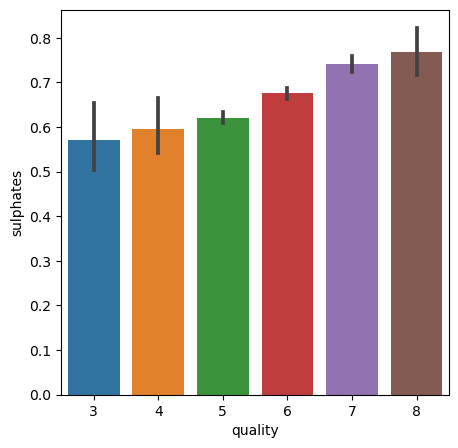

In [22]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='sulphates',data=red_wine)
plt.show()

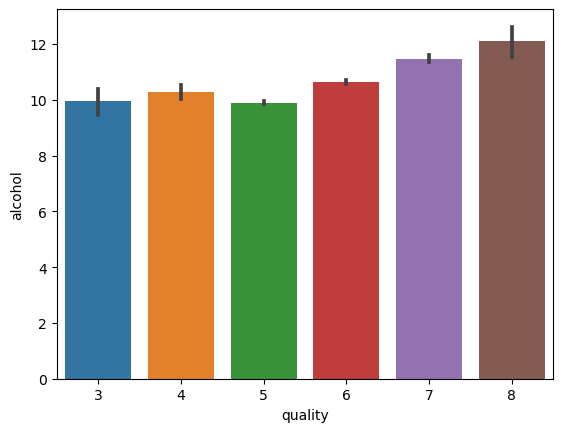

In [23]:
# plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='alcohol',data=red_wine)
plt.show()

from the above visualization we can say that the reason that can impact the quality of the wine are :-
    high chlorides and volatile acidity
where as the increase in sulphates, alcoho, citric acid enhances the quality of the wine    


# time to train the data:=



What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.


In [24]:
x=red_wine.iloc[:,:-1]

In [25]:
y=red_wine.iloc[:,-1]

In [26]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
Y=red_wine['quality'].apply(lambda y_value:1  if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [29]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [30]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [31]:
maxAcu = 0
maxRS = 0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test =train_test_split(X,Y, train_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(X_train, Y_train)
    pred = RFR.predict(X_test)
    acc= accuracy_score(Y_test, pred)
    if acc> maxAcu:
        maxAcu = acc
        maxRs = i
print("Best Accuracy : ", maxAcu, "with Random State", maxRS)

Best Accuracy :  0.9089285714285714 with Random State 0


In [32]:
 X_train,X_test,Y_train,Y_test =train_test_split(X,Y, train_size=0.30, random_state=maxRS)

In [33]:
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(Y_test, predrfc))
print(confusion_matrix(Y_test, predrfc))
print(classification_report(Y_test, predrfc))

0.8776785714285714
[[935  45]
 [ 92  48]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.52      0.34      0.41       140

    accuracy                           0.88      1120
   macro avg       0.71      0.65      0.67      1120
weighted avg       0.86      0.88      0.87      1120



In [34]:
score = cross_val_score(rfc,X,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predrfc) - score.mean())

[0.875      0.8375     0.884375   0.859375   0.88401254]
0.8680525078369905
Difference btw accurancy and CV score is   0.009626063591580913


Logistic Regression

In [35]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
print(accuracy_score(Y_test, predlr))
print(confusion_matrix(Y_test, predlr))
print(classification_report(Y_test, predlr))

0.8633928571428572
[[913  67]
 [ 86  54]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.45      0.39      0.41       140

    accuracy                           0.86      1120
   macro avg       0.68      0.66      0.67      1120
weighted avg       0.86      0.86      0.86      1120



In [36]:
score = cross_val_score(lr,X,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is ",accuracy_score(Y_test, predlr) - score.mean())

[0.865625   0.859375   0.8875     0.840625   0.88401254]
0.8674275078369906
Difference btw accurancy and CV score is  -0.004034650694133446


Support Vector Machine

In [37]:
svm=SVC()
svm.fit(X_train,Y_train)
predsvm=svm.predict(X_test)
print(accuracy_score(Y_test, predsvm))
print(confusion_matrix(Y_test, predsvm))
print(classification_report(Y_test, predsvm))

0.8839285714285714
[[943  37]
 [ 93  47]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       980
           1       0.56      0.34      0.42       140

    accuracy                           0.88      1120
   macro avg       0.73      0.65      0.68      1120
weighted avg       0.87      0.88      0.87      1120



In [38]:
score = cross_val_score(svm,X,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predsvm) - score.mean())

[0.878125   0.85       0.896875   0.853125   0.86833856]
0.8692927115987461
Difference btw accurancy and CV score is   0.014635859829825293


Gradient Boosting Classifier

In [39]:
gb= GradientBoostingClassifier()
gb.fit(X_train,Y_train)
predgb=gb.predict(X_test)
print(accuracy_score(Y_test, predgb))
print(confusion_matrix(Y_test, predgb))
print(classification_report(Y_test, predgb))

0.8758928571428571
[[922  58]
 [ 81  59]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.50      0.42      0.46       140

    accuracy                           0.88      1120
   macro avg       0.71      0.68      0.69      1120
weighted avg       0.87      0.88      0.87      1120



In [40]:
score = cross_val_score(gb,X,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predgb) - score.mean())

[0.8875     0.85625    0.878125   0.84375    0.87460815]
0.8680466300940439
Difference btw accurancy and CV score is   0.007846227048813215


Ada Boost Classifier

In [41]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)
predad=svm.predict(X_test)
print(accuracy_score(Y_test, predad))
print(confusion_matrix(Y_test, predad))
print(classification_report(Y_test, predad))

0.8839285714285714
[[943  37]
 [ 93  47]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       980
           1       0.56      0.34      0.42       140

    accuracy                           0.88      1120
   macro avg       0.73      0.65      0.68      1120
weighted avg       0.87      0.88      0.87      1120



In [42]:
score = cross_val_score(ad,X,Y)
print(score)
print(score.mean())
print("Difference btw accurancy and CV score is  ",accuracy_score(Y_test, predad) - score.mean())

[0.88125    0.80625    0.896875   0.84375    0.86206897]
0.8580387931034483
Difference btw accurancy and CV score is   0.02588977832512307


Gradient Boost Classifier has least difference

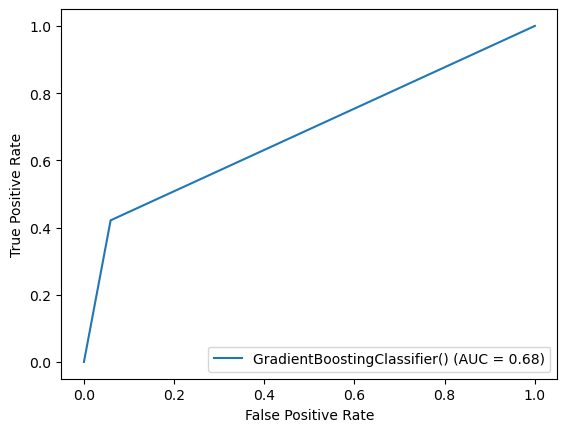

In [43]:
from sklearn import metrics
met=metrics
fpr,tpr,thresholds = met.roc_curve(Y_test, predgb)
roc_auc =met.auc(fpr,tpr)
display = met.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name= gb)
display.plot()

 saving the model

In [44]:
import joblib
joblib.dump(gb,'Red-wine_quality.pkl')    

['Red-wine_quality.pkl']

In [45]:
model =joblib.load('Red-wine_quality.pkl')
pred=model.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
input_data =(8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5)
in_dt=np.array(input_data)
fin_in_dt= in_dt.reshape(1,-1)

In [47]:
pred= model.predict(fin_in_dt)

In [48]:
if pred == 1:
    print('The quality of wine is good')
else:
    print("The quality of wine is not up to the mark")

The quality of wine is good


# END